In [ ]:
import cv2
import numpy as np
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from sklearn.cluster import KMeans
from skimage import io

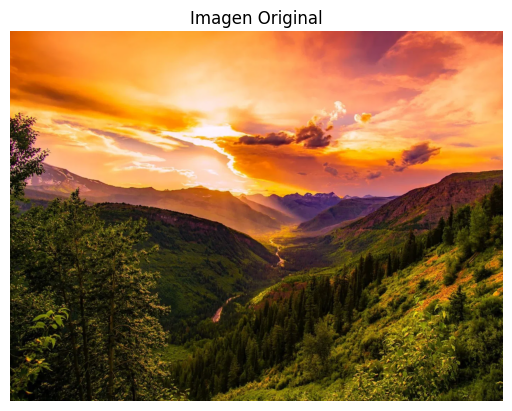

In [ ]:
# Cargar la imagen
image = io.imread('/content/drive/MyDrive/Semestre 8/Visión por computador /Clase 4/paisaje-og.webp')
plt.imshow(image)
plt.axis('off')
plt.title('Imagen Original')
plt.show()

##**Segementacion con K-means utilizando SKLearns**

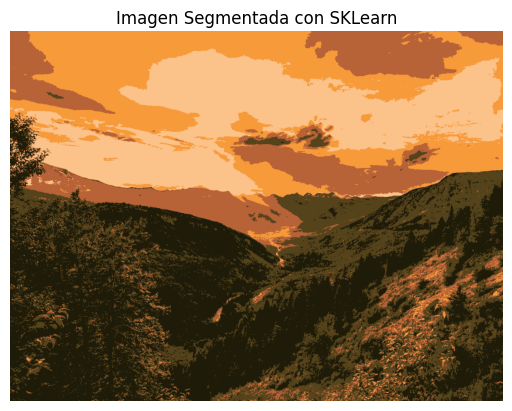

In [ ]:
# Obtener las dimensiones de la imagen
width, height, depth = image.shape

# Convertir la imagen en un arreglo 2D (pixeles x características)
image_array = image.reshape((width * height, depth))

# Número de clusters deseados (puedes cambiar este valor)
k = 5

# Aplicar K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(image_array)

# Obtener los labels asignados a cada píxel
segmented_labels = kmeans.labels_

# Obtener los colores promedio de cada cluster
segmented_image = kmeans.cluster_centers_[segmented_labels]

# Convertir la imagen segmentada a la forma original
segmented_image = segmented_image.reshape((width, height, depth)).astype(np.uint8)

# Mostrar la imagen segmentada
plt.imshow(segmented_image)
plt.axis('off')
plt.title(f'Imagen Segmentada con SKLearn')
plt.show()

##**Segmentación con K-means utilizando OpenCV**

In [ ]:
# Cargar la imagen
image = cv2.imread('/content/drive/MyDrive/Semestre 8/Visión por computador /Clase 4/paisaje-og.webp')

# Convertir la imagen de BGR a RGB (porque OpenCV carga en BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir la imagen en un arreglo 2D (pixeles x características)
pixel_values = image_rgb.reshape((-1, 3))

# Convertir los valores de los píxeles a tipo float32
pixel_values = np.float32(pixel_values)

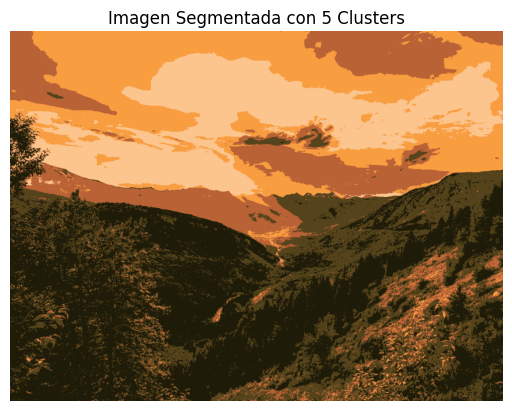

In [ ]:
# Definir criterios de terminación
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Número de clusters (puedes ajustar este valor)
k = 5

# Aplicar K-means
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convertir los centros (valores medios de cada cluster) a enteros
centers = np.uint8(centers)

# Asignar los valores medios a los píxeles
segmented_image = centers[labels.flatten()]

# Cambiar la forma de la imagen segmentada a la original
segmented_image = segmented_image.reshape(image_rgb.shape)

# Mostrar la imagen segmentada
plt.imshow(segmented_image)
plt.axis('off')
plt.title(f'Imagen Segmentada con {k} Clusters')
plt.show()


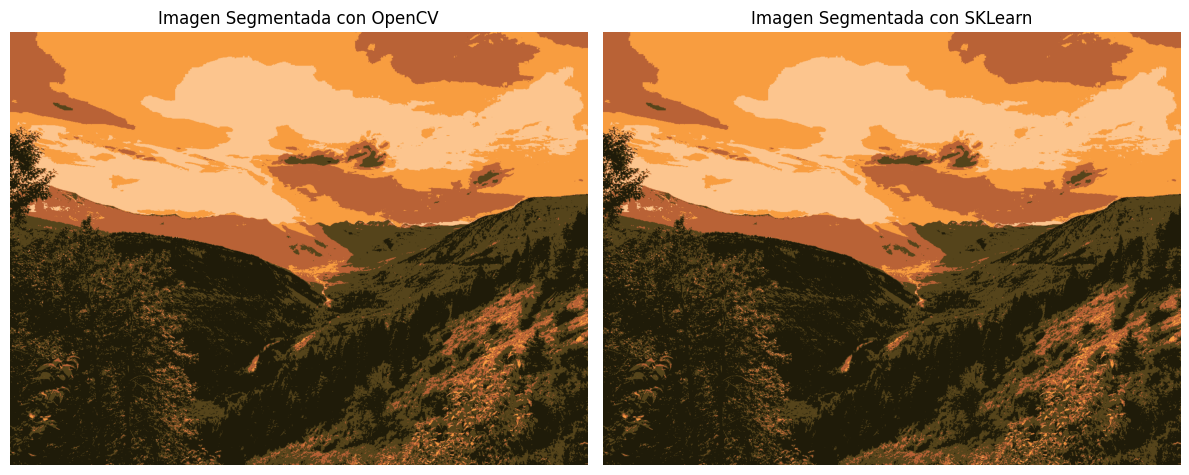

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(segmented_image)
axes[0].axis('off')
axes[0].set_title('Imagen Segmentada con OpenCV')


axes[1].imshow(segmented_image)
axes[1].axis('off')
axes[1].set_title('Imagen Segmentada con SKLearn')


plt.tight_layout()
plt.show()